In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [22]:
results_df = pd.read_csv("../Statistics/service_time_trial.csv")
print(results_df.head())

   max_nw  active_workers_history  service_time_history  service_time_goal  \
0       8                       3                   141                100   
1       8                       3                   107                100   
2       8                       2                    59                100   
3       8                       2                    77                100   
4       8                       2                    76                100   

   emitter_elapsed_time_history  workers_elapsed_time_history  \
0                             7                           314   
1                            18                           327   
2                           216                           161   
3                             7                           153   
4                           187                           153   

   collector_elapsed_time_history  
0                            2192  
1                               0  
2                             22

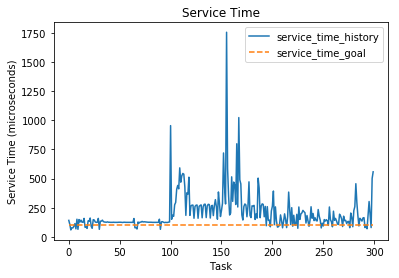

In [23]:
# plot servive_time_history vs service_time_goal
results_df.plot(y=['service_time_history', 'service_time_goal'],
                style=['-', '--'])
plt.ylabel('Service Time (microseconds)')
plt.xlabel('Task')
plt.title('Service Time')
plt.show()

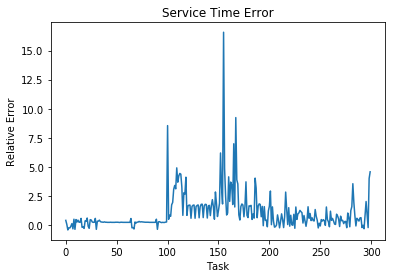

In [24]:
# plot relative error between  service_time_goal and service_time_history
y1 = np.array(results_df['service_time_history'])
y2 = np.array(results_df['service_time_goal'])

relative_error = (y1-y2)/y2

plt.plot(relative_error)
plt.ylabel('Relative Error')
plt.xlabel('Task')
plt.title('Service Time Error')
plt.show()

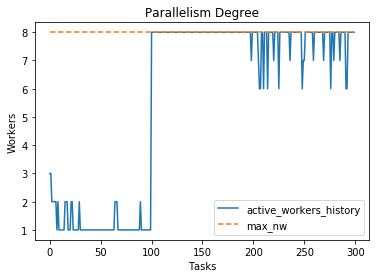

In [25]:
# plot parallelism degree vs max nw
results_df.plot(y=['active_workers_history', 'max_nw'],
                style=['-', '--'])
plt.ylabel('Workers')
plt.xlabel('Tasks')
plt.title('Parallelism Degree')
plt.show()

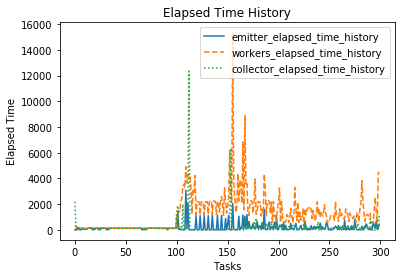

In [26]:
# plot emitter, workers and collector elapsed time history
results_df.plot(y=['emitter_elapsed_time_history','workers_elapsed_time_history','collector_elapsed_time_history'],
                style=['-', '--', ':'])
plt.ylabel('Elapsed Time')
plt.xlabel('Tasks')
plt.title('Elapsed Time History')
plt.show()